# CYCLING IN SYDNEY

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import math
from datetime import datetime

In [2]:
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = (10, 5)

In [4]:
saved_style_state = matplotlib.rcParams.copy()

## 1. importing data

In [5]:
if os.path.isfile("Cycleway Counts_01Jan18_11Sept20.xlsx"):
    filepath = "Cycleway Counts_01Jan18_11Sept20.xlsx"
    print("loading from file")
else:
    filepath = "https://opendata.transport.nsw.gov.au/system/files/resources/Cycleway%20Counts_01Jan18_11Sept20.xlsx"
    print("loading from the internet")

cycleway_usage = pd.read_excel(filepath, sheet_name="daily counts")
print("done")


loading from file
done


# 1.a ben's assistance

In [6]:
dir_lookup = ["North", "East", "South", "West", "All Directions"]
def get_mode(index):
    if index<5:
        return "Cycling"
    else:
        return "Pedestrian"

locations_sparse = [x for x in cycleway_usage.columns if "Unnamed" not in x ]

In [7]:
def get_loc(i, response_type="all"):
    try:
        loc = locations_sparse[math.ceil(i/15)]
        if response_type == "all":
            return loc
        elif response_type == "code":
            return loc.split("-")[0].strip()
        elif response_type == "name":
            return loc.split("-")[1].strip()
        # You can extend this to pull out the notes, like (Cycleway and Pedestrian counter), but they're pretty inconsistent
        else:
            print(f"`{response_type}` is not implemented yet")
    except:
        print("er")


In [8]:
new_rows = []
for i, row in cycleway_usage.iterrows():
    if i < 3:
        continue  # This feels nasty

    date = row[0]
    for loc_index in range(1, len(row) - 15, 15):
        section = row[
            loc_index : loc_index + 10
        ]  # 10 because we don't care about the Sum (All Transport Modes) section
        for col_index, col in enumerate(section):
            dir = dir_lookup[col_index % 5]
            if type(col) is int and col != 0 and dir != "All Directions":
                r = {
                    "date": date,
                    "location_name": get_loc(loc_index, "name"),
                    "station": get_loc(loc_index, "code"),
                    "mode_transport": get_mode(col_index),
                    "direction": dir,
                    "counter": int(col),
                }
                new_rows.append(r)

# 1.b converting datetime

In [9]:
time_df = pd.DataFrame(new_rows)
time_df.head()

,date,location_name,station,mode_transport,direction,counter
0,02/01/2018,"Falcon St Pedestrian Bridge , Cammeray (Cyclew...",100008,Cycling,North,9
1,02/01/2018,"Falcon St Pedestrian Bridge , Cammeray (Cyclew...",100008,Cycling,South,5
2,02/01/2018,"Falcon St Pedestrian Bridge , Cammeray (Cyclew...",100008,Pedestrian,North,7
3,02/01/2018,"Falcon St Pedestrian Bridge , Cammeray (Cyclew...",100008,Pedestrian,South,7
4,02/01/2018,"Ridge St Bridge, North Sydney (Cycleway and Pe...",100009,Pedestrian,East,88


In [10]:
time_df.iloc[0].date

'02/01/2018'

In [11]:
time_df['date_dt'] = pd.to_datetime(time_df['date'], infer_datetime_format=True, dayfirst=True)
time_df.sort_values(by='date_dt', inplace=True) 
time_df.set_index("date_dt", inplace=True)
time_df.head()

,date,location_name,station,mode_transport,direction,counter
date_dt,,,,,,
2018-01-02,02/01/2018,"Falcon St Pedestrian Bridge , Cammeray (Cyclew...",100008,Cycling,North,9
2018-01-02,02/01/2018,"Liverpool to Parramatta Rail Trail, Railway Te...",90905,Cycling,South,35
2018-01-02,02/01/2018,"Cooks River Cycleway, Marrickville South (Ped ...",90909,Cycling,East,270
2018-01-02,02/01/2018,"Cooks River Cycleway, Marrickville South (Ped ...",90909,Cycling,West,255
2018-01-02,02/01/2018,"Cooks River Cycleway, Marrickville South (Ped ...",90909,Pedestrian,East,75


In [12]:
new_counterdf = time_df.drop(columns=['date'])
new_counterdf.head()

,location_name,station,mode_transport,direction,counter
date_dt,,,,,
2018-01-02,"Falcon St Pedestrian Bridge , Cammeray (Cyclew...",100008,Cycling,North,9
2018-01-02,"Liverpool to Parramatta Rail Trail, Railway Te...",90905,Cycling,South,35
2018-01-02,"Cooks River Cycleway, Marrickville South (Ped ...",90909,Cycling,East,270
2018-01-02,"Cooks River Cycleway, Marrickville South (Ped ...",90909,Cycling,West,255
2018-01-02,"Cooks River Cycleway, Marrickville South (Ped ...",90909,Pedestrian,East,75


In [13]:
print(new_counterdf.shape) 

(43329, 5)


### Questions
* Who is travelling into the city, out of the city?
* Weekdays vs weekend? See comparison, poor connections? Limitations of only pathways/single counter?

## 2. data visualisation over time
* per day/ per month bar chart
* section off weekends?
* weekdays?

### 2.a Making useful graphs

Text(0.5, 1.0, 'Falcon St Pedestrian Bridge , Cammeray (Cycleway and Pedestrian counter)')

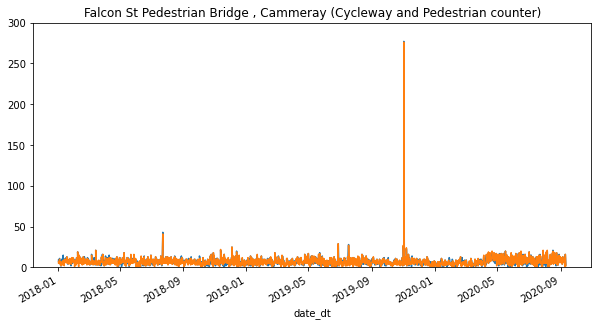

In [14]:
# AxesSubplot:xlabel= if station=="100008" use location_name
cammeray_counterdf = new_counterdf[new_counterdf.station=="100008"]
cammeray_counterdf[cammeray_counterdf.direction=="North"]["counter"].plot( )
cammeray_counterdf[cammeray_counterdf.direction=="South"]["counter"].plot( )
plt.ylim([0, 300])
plt.title(cammeray_counterdf.iloc[0].location_name)

Text(0.5, 1.0, 'Falcon St Pedestrian Bridge , Cammeray (Cycleway and Pedestrian counter)')

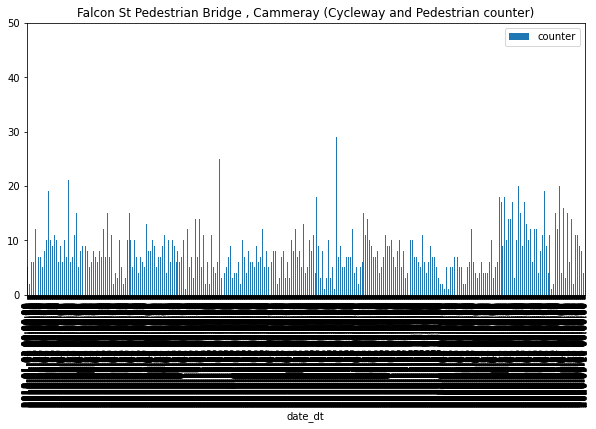

In [35]:
#cammeray_counterdf[cammeray_counterdf.direction=="South"]["counter"].plot.hist( )
#bar chart way more useful than line for this part
#cammeray_counterdf[cammeray_counterdf.direction=="North"]["counter"].plot.hist(column=["date_dt"], by="counter", figsize=(10, 8))
#copypaste
#cammeray_counterdf[cammeray_counterdf.direction=="North"].plot.hist(column="date_dt", by="counter")
#this one should work???
#cammeray_counterdf.groupby(['direction']).sum().plot(kind='histogram', y='counter')

#cammeray_counterdf.plot.bar()
cammeray_counterdf[cammeray_counterdf.direction=="North"].plot.bar( )
#cammeray_counterdf[cammeray_counterdf.direction=="South"].plot.bar( )
plt.ylim([0, 50])
plt.title(cammeray_counterdf.iloc[0].location_name)

<AxesSubplot:xlabel='direction'>

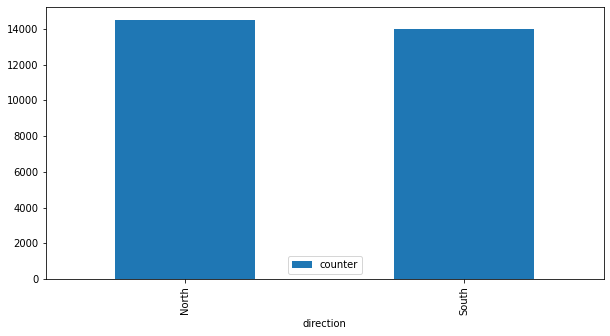

In [38]:
cammeray_counterdf.groupby(['direction']).sum().plot(kind='bar', y='counter')

(0.0, 750.0)

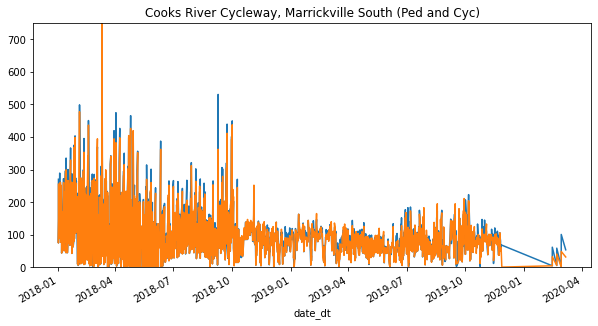

In [ ]:
marrickville_counterdf = new_counterdf[new_counterdf.station=="90909"]
marrickville_counterdf[marrickville_counterdf.direction=="East"]["counter"].plot( )
marrickville_counterdf[marrickville_counterdf.direction=="West"]["counter"].plot( )
plt.title(marrickville_counterdf.iloc[0].location_name)
plt.ylim([0, 750])

<AxesSubplot:xlabel='date_dt'>

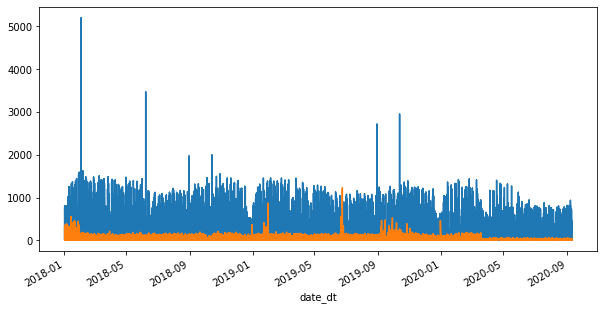

In [19]:
new_counterdf[new_counterdf.mode_transport=="Cycling"]["counter"].plot( )
new_counterdf[new_counterdf.mode_transport=="Pedestrian"]["counter"].plot( )
#plot within one dataset???

<AxesSubplot:ylabel='counter'>

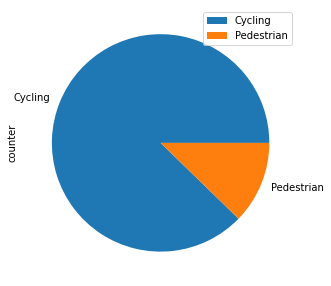

In [25]:
#new_counterdf[new_counterdf.mode_transport].plot.pie(y='counter', labels='mode_transport')
new_counterdf.groupby(['mode_transport']).sum().plot(kind='pie', y='counter')

Text(0.5, 1.0, 'Cooks River Cycleway, Marrickville South (Ped and Cyc)')

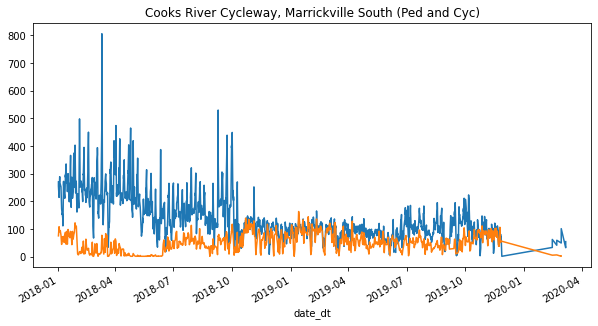

In [28]:
marrickville_counterdf[marrickville_counterdf.mode_transport=="Cycling"]["counter"].plot( )
marrickville_counterdf[marrickville_counterdf.mode_transport=="Pedestrian"]["counter"].plot( )
plt.title(marrickville_counterdf.iloc[0].location_name)

## 3. data visualisation linked to location
* plot points on a map
* set size relation to counter (int)
* set colour/arrow relation to counter/direction
* where is there a lot of cycling? 

### 3.1 merging counter location

In [150]:
if os.path.isfile("cyclecounters-Oct-2019.csv"):
    counterfilepath = "cyclecounters-Oct-2019.csv"
    print("loading from file")
else:
    counterfilepath = "https://opendata.transport.nsw.gov.au/node/6771/download"
    print("loading from the internet")

cycleway_counterlocation = pd.read_csv(counterfilepath)
print("done")

loading from file
done


In [151]:
cycleway_counterlocation.columns

Index(['objectid', 'station', 'region', 'geolocation', 'location', 'shortname',
       'notes', 'y_2018_oct', 'y_2018_nov', 'y_2018_dec', 'y_2019_jan',
       'y_2019_feb', 'y_2019_mar', 'y_2019_apr', 'y_2019_may', 'y_2019_jun',
       'y_2019_jul', 'y_2019_aug', 'y_2019_sep', 'y_month_max', 'y_2007',
       'y_2008', 'y_2009', 'y_2010', 'y_2011', 'y_2012', 'y_2013', 'y_2014',
       'y_2015', 'y_2016', 'y_2017', 'y_2018', 'y_2019', 'y_max_year',
       'active'],
      dtype='object')

In [152]:
cycleway_counterlocation.sort_values(by='station', inplace=True)
counterstation_df = cycleway_counterlocation.drop(columns=['objectid', 'geolocation','y_2018_oct', 'y_2018_nov', 'y_2018_dec', 'y_2019_jan',
       'y_2019_feb', 'y_2019_mar', 'y_2019_apr', 'y_2019_may', 'y_2019_jun',
       'y_2019_jul', 'y_2019_aug', 'y_2019_sep', 'y_month_max', 'y_2007',
       'y_2008', 'y_2009', 'y_2010', 'y_2011', 'y_2012', 'y_2013', 'y_2014',
       'y_2015', 'y_2016', 'y_2017', 'y_2018', 'y_2019', 'y_max_year'])
counterstation_df.head()

,station,region,location,shortname,notes,active
8,30011,Metro Sydney Inner West,"Iron Cove Bridge cycleway, near King George Pa...",Iron Cove Bridge,Interruptions due to construction work 2010/11...,Y
0,90902,Sydney City,"Sydney Harbour Bridge bicycle path, near Upper...",Sydney Harbour Bridge,None,Y
1,90903,Sydney City,"Anzac Bridge cycleway, near Quarry Master Driv...",Anzac Bridge,Counter inoperable from Feb 2015 to Oct 2015.,Y
21,90904,Metro Sydney West Central,"Liverpool to Parramatta Rail Trail, Broomfield...",Liverpool to Paramatta Rail Trail Cabramatta,Closed in 2012 due to work on Southern Sydney ...,Y
22,90905,Metro Sydney West Central,"Liverpool to Parramatta Rail Trail, Railway Te...",Liverpool to Parramatta Rail Trail Guildford,Counter inoperable Mar 2014 to June 2015.,Y


In [161]:
#joining
new_counterdf.join(counterstation_df.set_index('station'), on='station')

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

### 3.2 geopandas

In [96]:
import geopandas as gp
import shapely

In [130]:
gdf = gp.GeoDataFrame(counterstation_df)


<AxesSubplot:>

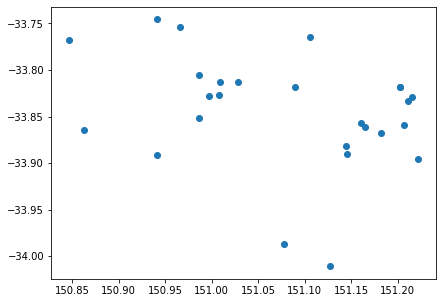

In [98]:
def make_a_point(loc_string):
    lat, lon = [float(x) for x in loc_string.split(" ")]
    return shapely.geometry.Point(lon, lat)

gdf.geometry = gdf.geolocation.apply(make_a_point)
gdf.plot()

In [99]:
if os.path.isfile("Cycle_network.geojson"):
    cyclemap = "Cycle_network.geojson"
    print("loading from file")
else:
    cyclemap = "https://opendata.transport.nsw.gov.au/node/6771/download"
    print("loading from the internet")

cycleway_map = gp.read_file(cyclemap)
print("done")

loading from file
done


In [100]:
cycleway_map.head()

,OBJECTID,RouteType,Source,Shape__Length,geometry
0,1,Separated off-road cycleway,2017 Sydney Cycling Guide and Map (Hardcopy pu...,469.101736,"LINESTRING (151.19943 -33.87661, 151.19916 -33..."
1,2,Separated off-road cycleway,2017 Sydney Cycling Guide and Map (Hardcopy pu...,111.214381,"LINESTRING (151.21908 -33.86977, 151.21915 -33..."
2,3,Separated off-road cycleway,2017 Sydney Cycling Guide and Map (Hardcopy pu...,175.037503,"LINESTRING (151.21484 -33.88081, 151.21488 -33..."
3,4,Separated off-road cycleway,2017 Sydney Cycling Guide and Map (Hardcopy pu...,18.417650,"LINESTRING (151.20401 -33.86277, 151.20399 -33..."
4,5,Separated off-road cycleway,2017 Sydney Cycling Guide and Map (Hardcopy pu...,280.328830,"LINESTRING (151.20302 -33.90095, 151.20241 -33..."


<AxesSubplot:>

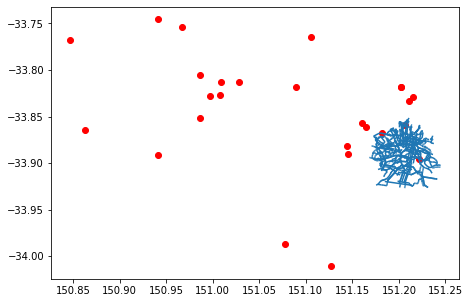

In [101]:
base = cycleway_map.plot()
gdf.plot(ax=base, c='red')

## 4. next steps?
* import datasets from Strava, Google Maps, layer over data
* understand why cycling is used: recreation/commuting?
* understand why cycling is *NOT* used
* start playing with cycle pathways?
* feed into research: making Parramatta road a cycleway